### <b> Heart Disease Prediction </b>

#### Table of contents
* [Context](#1)
* [About Dataset](#2)
* [Importing the Dependecies](#3)
* [Data Loading](#4)
* [Data Preprocessing](#5)
    * [Exploratory Data Analysis](#6)
    * [Outlier Detection](#7)
    * [Correlation-Matrix](#8)
* [Data Splitting & Scaling](#9)
* [Model Building/ Evaluation](#10)
    * [Logisitic Regression](#11) 
    * [KNeighborsClassifier](#12)
    * [SVC](#13)
    * [DecisionTreeClassifier](#14)
* [Hyperparameter Tuning (Random Search)](#15)
* [Final Model & ROC Plot](#16)
* [Model Saving](#17)
* [Predictive System](#18)
* [Conclusion](#19)


#### <b> <a id='1' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Context</a><b>

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.


#### <b> <a id='2' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>About Dataset</a><b>

| Feature                                           | Description                                                                       |
|---------------------------------------------------|-----------------------------------------------------------------------------------|
| Age                                               | Age of the individual                                                             |
| Sex                                               | Sex of the individual (0 = Female, 1 = Male)                                      |
| Chest Pain Type (4 Values)                       | Type of chest pain experienced (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic) |
| Resting Blood Pressure                           | Resting blood pressure in mm Hg                                                    |
| Serum Cholesterol (mg/dL)                        | Serum cholesterol level in mg/dL                                                   |
| Fasting Blood Sugar (> 120 mg/dL)                | Fasting blood sugar level (0 = <= 120 mg/dL, 1 = > 120 mg/dL)                      |
| Resting Electrocardiographic Results (Values 0, 1, 2) | Resting electrocardiographic results (0 = Normal, 1 = Abnormal, 2 = Left Ventricular Hypertrophy) |
| Maximum Heart Rate Achieved                      | Maximum heart rate achieved during exercise                                        |
| Exercise-Induced Angina                          | Presence of exercise-induced angina (0 = No, 1 = Yes)                              |
| Oldpeak (ST Depression Induced by Exercise Relative to Rest) | ST depression induced by exercise relative to rest                           |
| Slope of the Peak Exercise ST Segment            | Slope of the peak exercise ST segment (0 = Downsloping, 1 = Upsloping, 2 = Flat)    |
| Number of Major Vessels (0-3) Colored by Flourosopy | Number of major vessels colored by fluoroscopy (0-3)                            |
| Thal: 0 = Normal; 1 = Fixed Defect; 2 = Reversible Defect | Thalassemia category (0 = Normal, 1 = Fixed Defect, 2 = Reversible Defect)     |
| Target: 0=No: 1=Yes | Detected Heart Disease


#### <b> <a id='3' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Importing the Dependecies</a><b>

In [66]:
#data manipulation and plotting
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme('notebook')
import matplotlib.pyplot as plt

#data preprocessing and model building
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler

#model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#evaluation
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix


import warnings as w
w.filterwarnings('ignore')

#### <b> <a id='4' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Data Loading</a><b>

In [2]:
import os

#path to the dataset
dataset = '../dataset'

for dirname, _ , filenames in os.walk(dataset):
    for file in filenames:
        #getting the path
        path = os.path.join(dirname, file)

#reading in the casv file
heart_df = pd.read_csv(f'{path}')

In [3]:
#displayin gthe first 5 rows
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Inferences:
1. The Data has already been encoded. We will need to decode it for better Analysis.
2. The Features name will be changed for easier understanding.

#### <b> <a id='5' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Data Preprocessing</a><b>

In [4]:
#checking the number of rows and columns
print(f'The Data has {heart_df.shape[1]} Features/Attributes and {heart_df.shape[0]} Observations/Rows ')

The Data has 14 Features/Attributes and 1025 Observations/Rows 


In [5]:
#general info
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
#checkinf for missing values
heart_df[heart_df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [7]:
#checking for dupliacte values
heart_df.duplicated().sum()

723

In [8]:
#dropping dupliacte values
heart_df.drop_duplicates(inplace=True)
print(f'Total Number of Duplicates after removal: {heart_df.duplicated().sum()}')

Total Number of Duplicates after removal: 0


In [9]:
#overall statistics
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# New column names
column_names = {
    'age': 'Age',
    'sex': 'Gender',
    'cp': 'Chest Pain',
    'trestbps': 'Resting_BP',
    'chol': 'Cholesterol',
    'fbs': 'Fast_BS',
    'restecg': 'Resting_Electrocardiographic',
    'thalach': 'Max_HeartRate',
    'exang': 'Exercise_Angina',
    'oldpeak': 'Oldpeak',
    'slope': 'Slope',
    'thal':'Thalassemia',
    'target': 'Target'
}

# Rename the columns
heart_df = heart_df.rename(columns=column_names)

heart_df.columns

Index(['Age', 'Gender', 'Chest Pain', 'Resting_BP', 'Cholesterol', 'Fast_BS',
       'Resting_Electrocardiographic', 'Max_HeartRate', 'Exercise_Angina',
       'Oldpeak', 'Slope', 'ca', 'Thalassemia', 'Target'],
      dtype='object')

In [11]:
#checking the values counts for each feature
for idx, val in enumerate(heart_df.columns.tolist()):

    if heart_df[val].nunique() <=4:
        print(f'For {val}')
       
        print(
            heart_df[val].value_counts()
        )
        print('---'*20)
        print('\n')

print('Complete', '--'*20)

For Gender
Gender
1    206
0     96
Name: count, dtype: int64
------------------------------------------------------------


For Chest Pain
Chest Pain
0    143
2     86
1     50
3     23
Name: count, dtype: int64
------------------------------------------------------------


For Fast_BS
Fast_BS
0    257
1     45
Name: count, dtype: int64
------------------------------------------------------------


For Resting_Electrocardiographic
Resting_Electrocardiographic
1    151
0    147
2      4
Name: count, dtype: int64
------------------------------------------------------------


For Exercise_Angina
Exercise_Angina
0    203
1     99
Name: count, dtype: int64
------------------------------------------------------------


For Slope
Slope
2    141
1    140
0     21
Name: count, dtype: int64
------------------------------------------------------------


For Thalassemia
Thalassemia
2    165
3    117
1     18
0      2
Name: count, dtype: int64
------------------------------------------------------

In [12]:
def merge(text):
    if text == 0:
        return 1
    else: return text

heart_df['Thalassemia']= heart_df['Thalassemia'].apply(merge)

In [13]:
#column mapping 
column_mappings = {
    'Gender': {0: 'Female', 1: 'Male'},
    'Chest Pain': {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'},
    'Fast_BS': {0: 'No', 1:'Yes'},
    'Resting_Electrocardiographic': {0: 'Normal', 1: 'Abnormal', 2: 'Left Ventricular Hypertrophy'},
    'Exercise_Angina': {0: 'No', 1: 'Yes'},
    'Slope': {0: 'Downsloping', 1: 'Upsloping', 2: 'Flat'},
    'Thalassemia': {1 : 'Reversible Defect', 2:'Fixed Defect', 3:'Normal'},
    'Target': {0: 'No', 1: 'Yes'}
}

for col , map in column_mappings.items():
    heart_df[col] = heart_df[col].map(map)

print('Completed', '--'*20)

Completed ----------------------------------------


#### <b> <a id='6' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Exploratory Data Analysis</a><b>

In [14]:
#helper function
def dist_plot(col_list):
    plt.figure(figsize=(15,9))

    colors =  ['#8e0201', '#e8cccc']

    for idx, col in enumerate(col_list):
        plt.subplot(2,3,idx+1)

        sns.distplot(
            x= heart_df[col],
            color=colors[0]
        )

        plt.title(f'{col} Distribution Plot')
        plt.tight_layout(w_pad=0.5, h_pad=0.5)
    plt.show()



def count_plot(col_list):

    plt.figure(figsize=(15,15))

    colors = ['#8e0201', '#e8cccc', '#c2211a']

    for idx, col in enumerate(col_list):
        plt.subplot(3,3, idx+1)

        sns.countplot(
            x=heart_df[col],
            palette=colors
        )
        plt.title(f'{col} Total Number')
        plt.tight_layout(w_pad=0.5, h_pad=1.5)
        plt.xlabel(f'{col}', fontsize=16)
        plt.xticks(rotation=45)
    plt.show()        


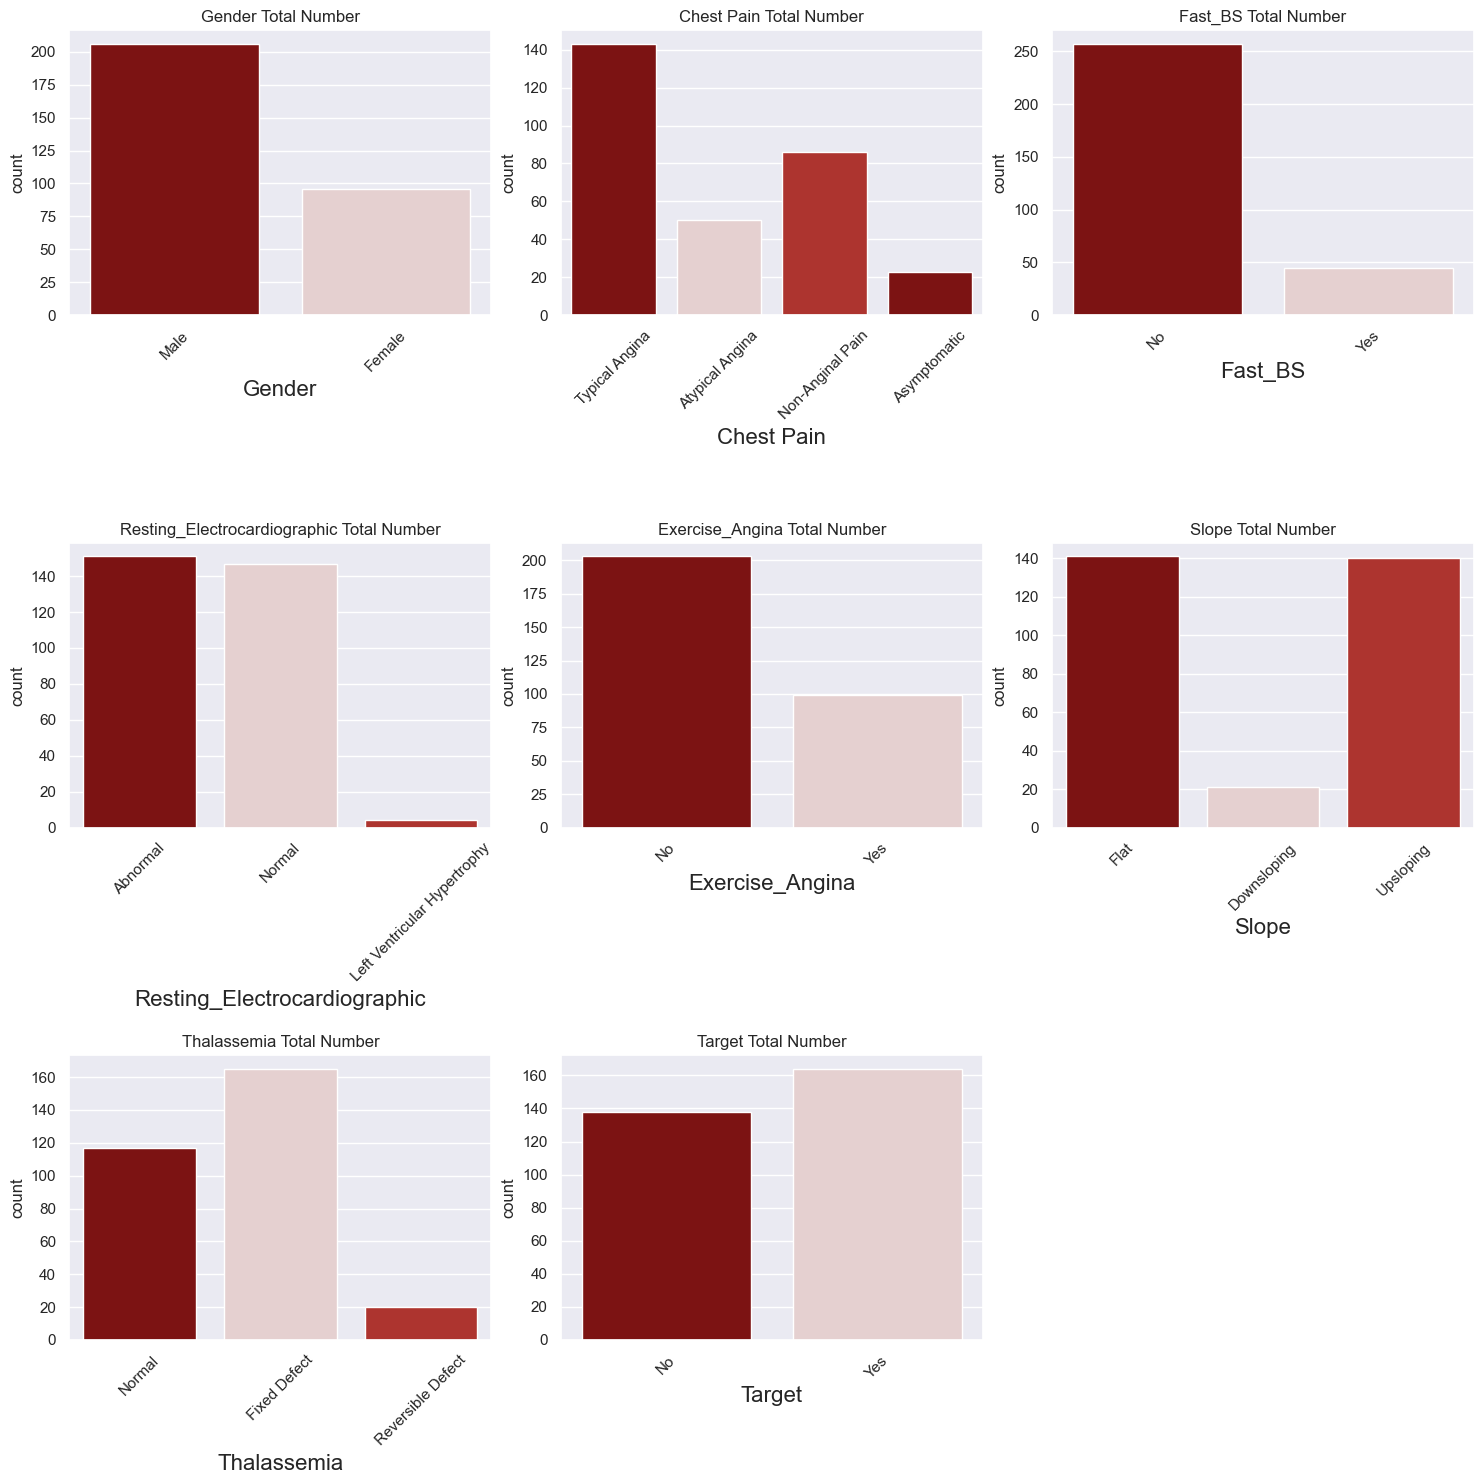

In [15]:
#selecting categorical columns
cat_cols = heart_df.select_dtypes(exclude=np.number).columns.to_list()

#plot the countplot
count_plot(cat_cols)

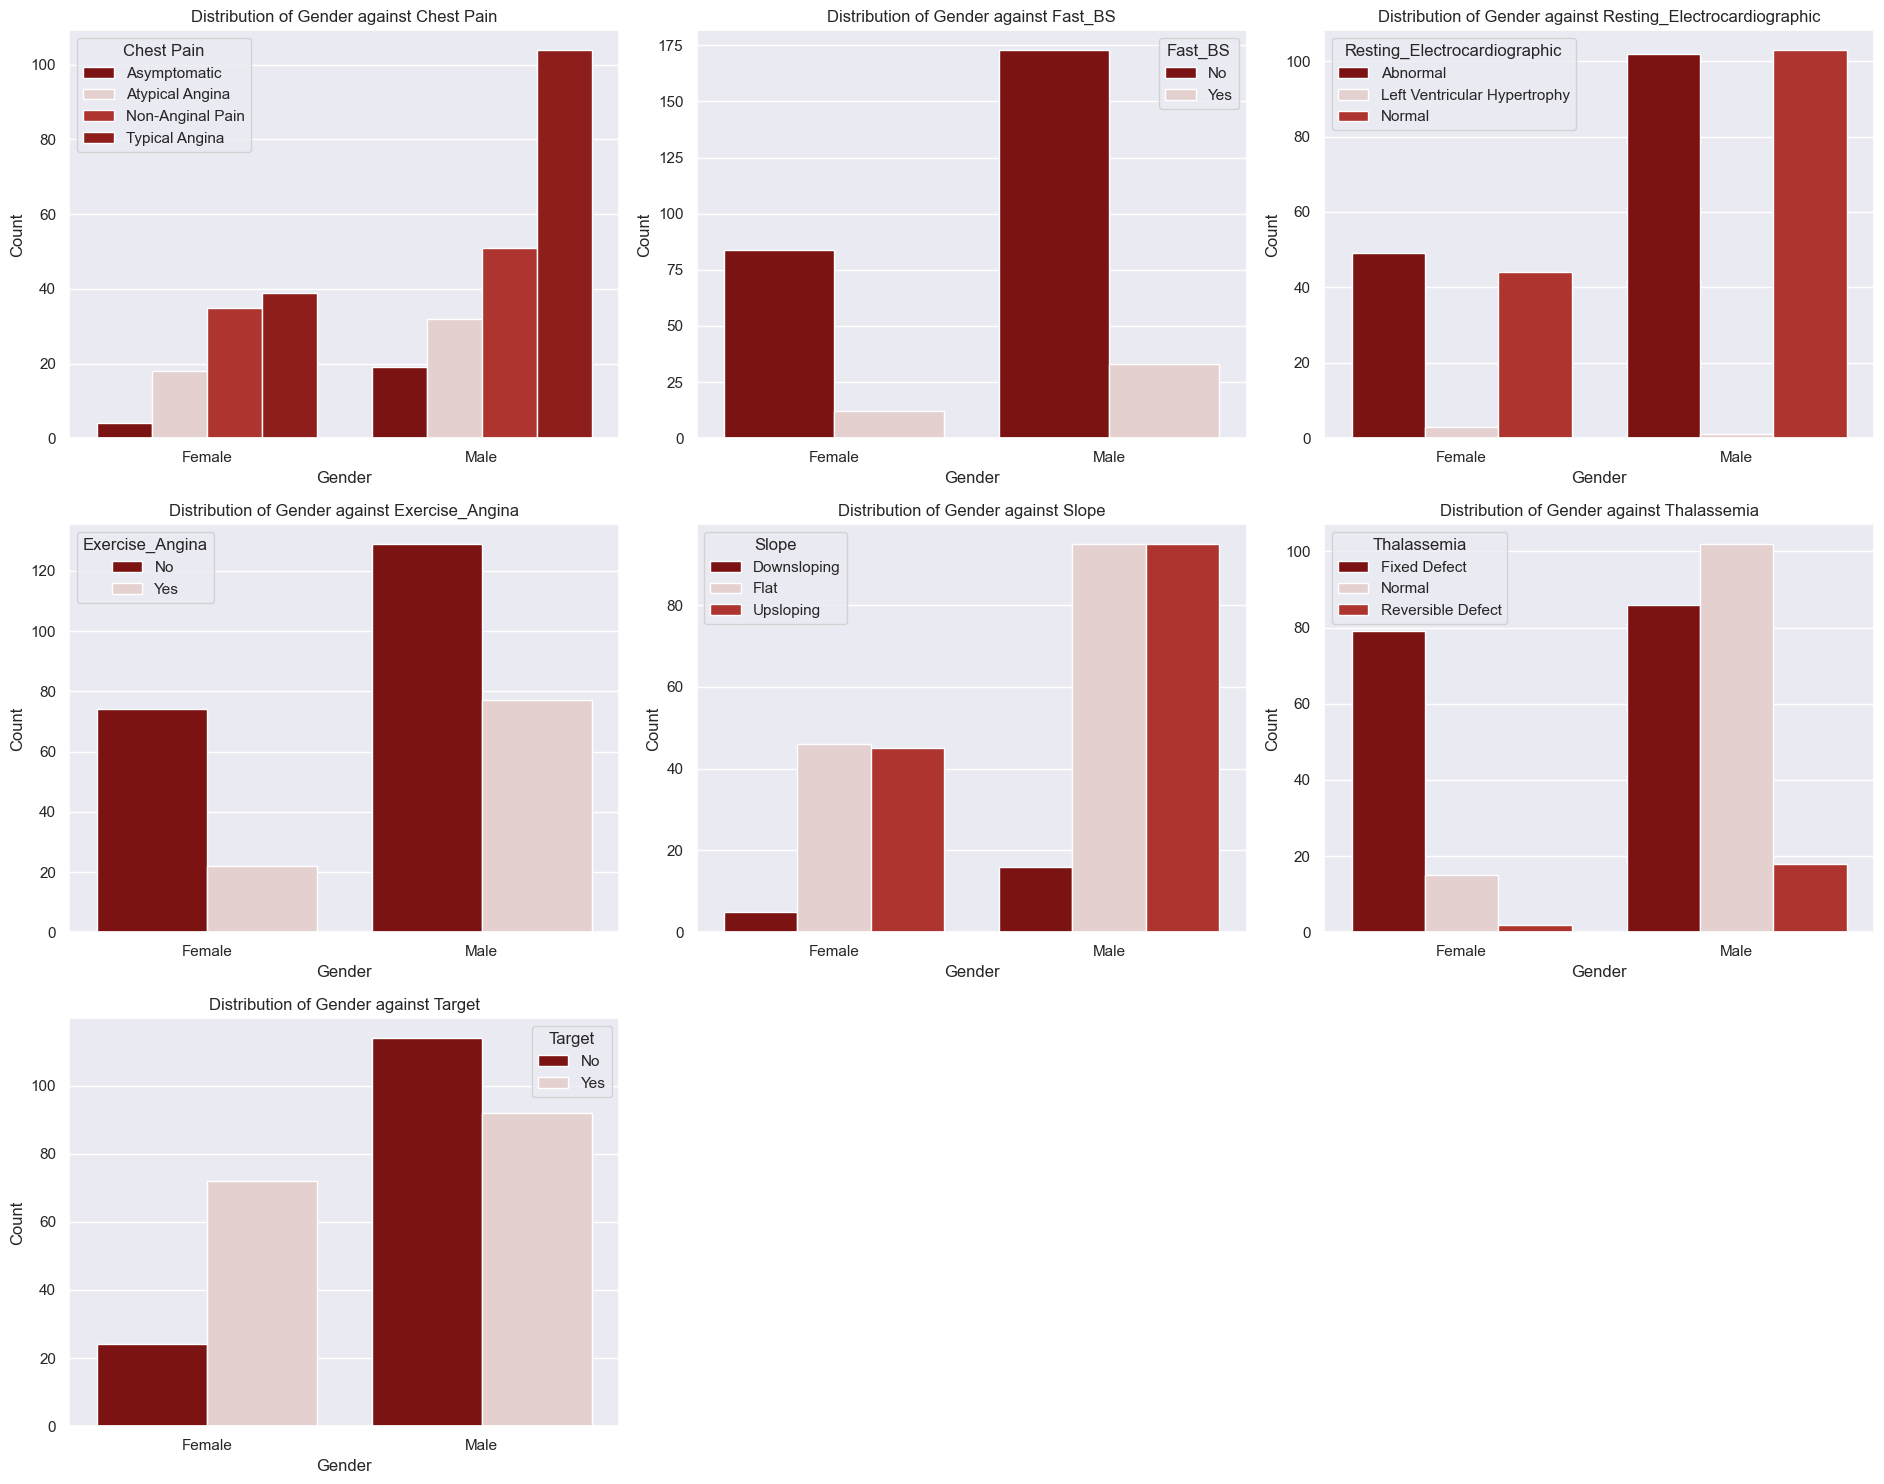

In [16]:
## Visualization Based on Gender

#helper function
def group_plot(x, data):
    plt.figure(figsize=(19, 15))
    columns = ['Chest Pain', 'Fast_BS', 'Resting_Electrocardiographic', 'Exercise_Angina', 'Slope', 'Thalassemia', 'Target']
    
    for idx, col in enumerate(columns):
        colors = ['#8e0201','#e8cccc', '#c2211a',  '#a10c09', '#d32b22', '#e4352b']
        grouped_data = data.groupby([x, col]).size().reset_index(name='count')
        plt.subplot(3,3, idx + 1)
        sns.barplot(data=grouped_data, x=x, y='count', hue=col, palette=colors)
        plt.title(f'Distribution of {x} against {col}')
        plt.xlabel(x)
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

#displaying the countplot against gender
group_plot(x='Gender', data=heart_df)

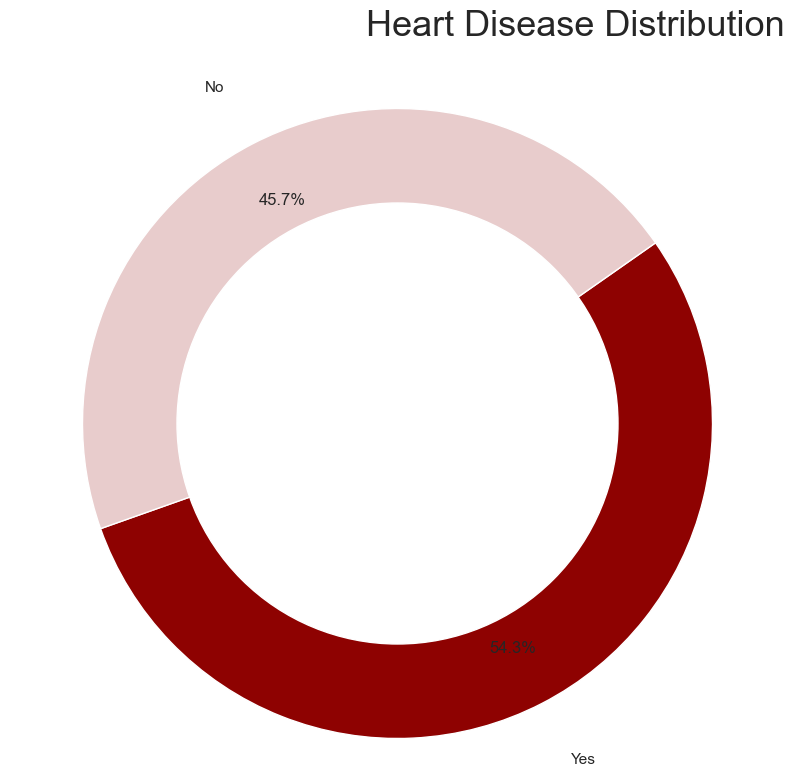

In [18]:
#target class
counts = heart_df['Target'].value_counts(normalize=True) *100
labels= ['Yes', 'No']

colors =  ['#8e0201', '#e8cccc']

plt.figure(figsize=(10,9))

#plotting a pie chart
wedges, texts, autotexts = plt.pie(counts, colors=colors, startangle=35, counterclock=False, autopct='%1.1f%%',
                                  pctdistance=0.8, labeldistance=1.2, labels=labels)

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)

# Set title and equal aspect ratio
plt.title('Heart Disease Distribution', fontsize=26, loc='right', pad=30)
plt.axis('equal')



plt.show()

Inferences:
1. The Target Feature is showing somewhat of a class balance.

In [19]:
#selecting numerical columns
num_cols = heart_df.select_dtypes(exclude='object').columns.to_list()

for idx, col in enumerate(num_cols):
    
    print(f'For {col.upper()}')
    print(
        heart_df[col].describe()
    )
    print('---'*20)
    print('\n')

For AGE
count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: Age, dtype: float64
------------------------------------------------------------


For RESTING_BP
count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: Resting_BP, dtype: float64
------------------------------------------------------------


For CHOLESTEROL
count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: Cholesterol, dtype: float64
------------------------------------------------------------


For MAX_HEARTRATE
count    302.000000
mean     149.569536
std       22.903527
min       71.000000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: Max_HeartRate, dtype: f

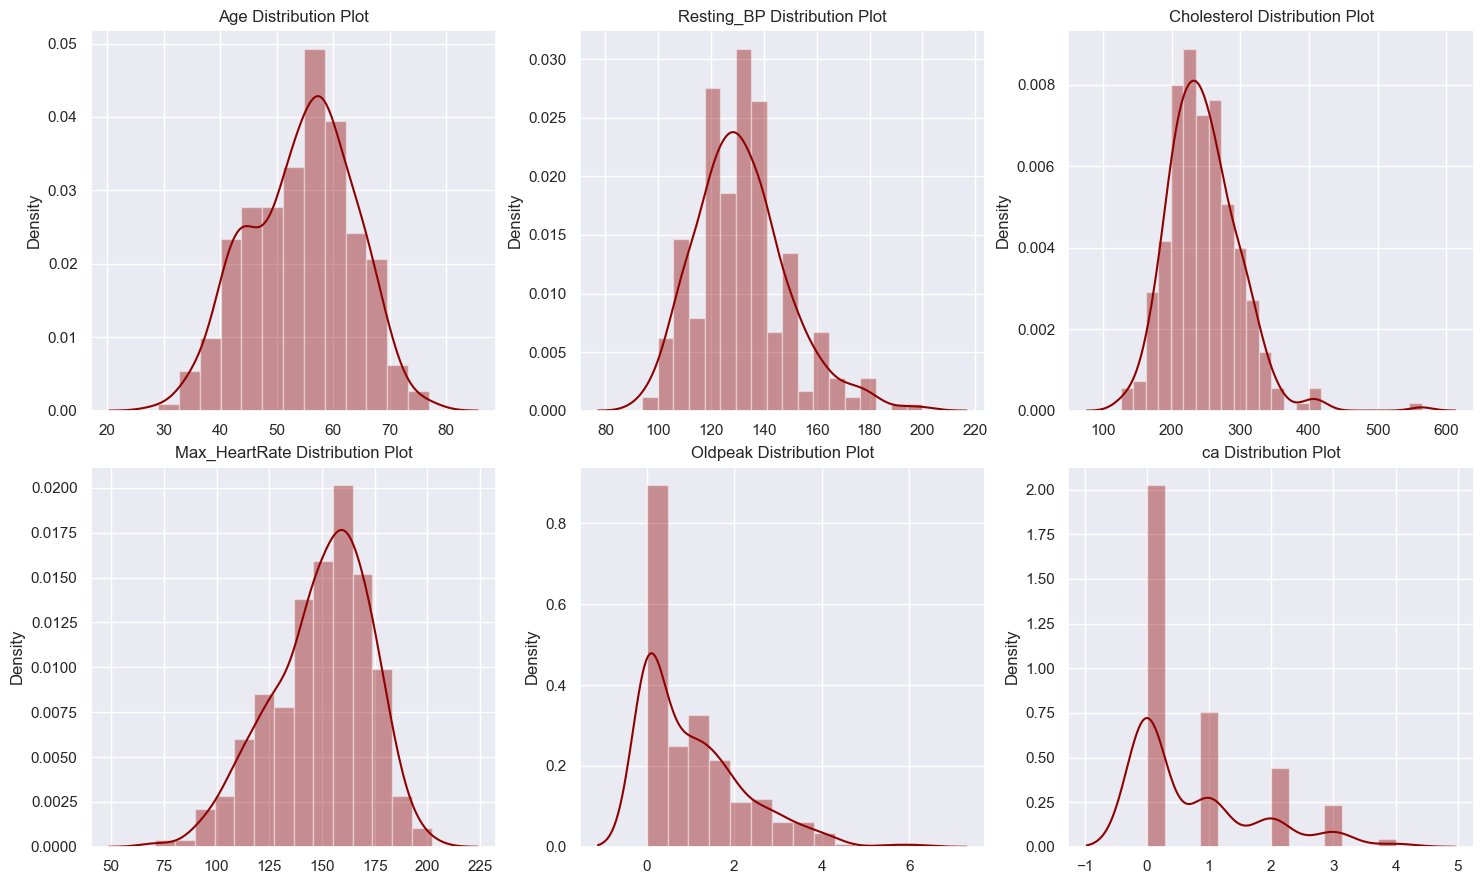

In [20]:
dist_plot(num_cols)

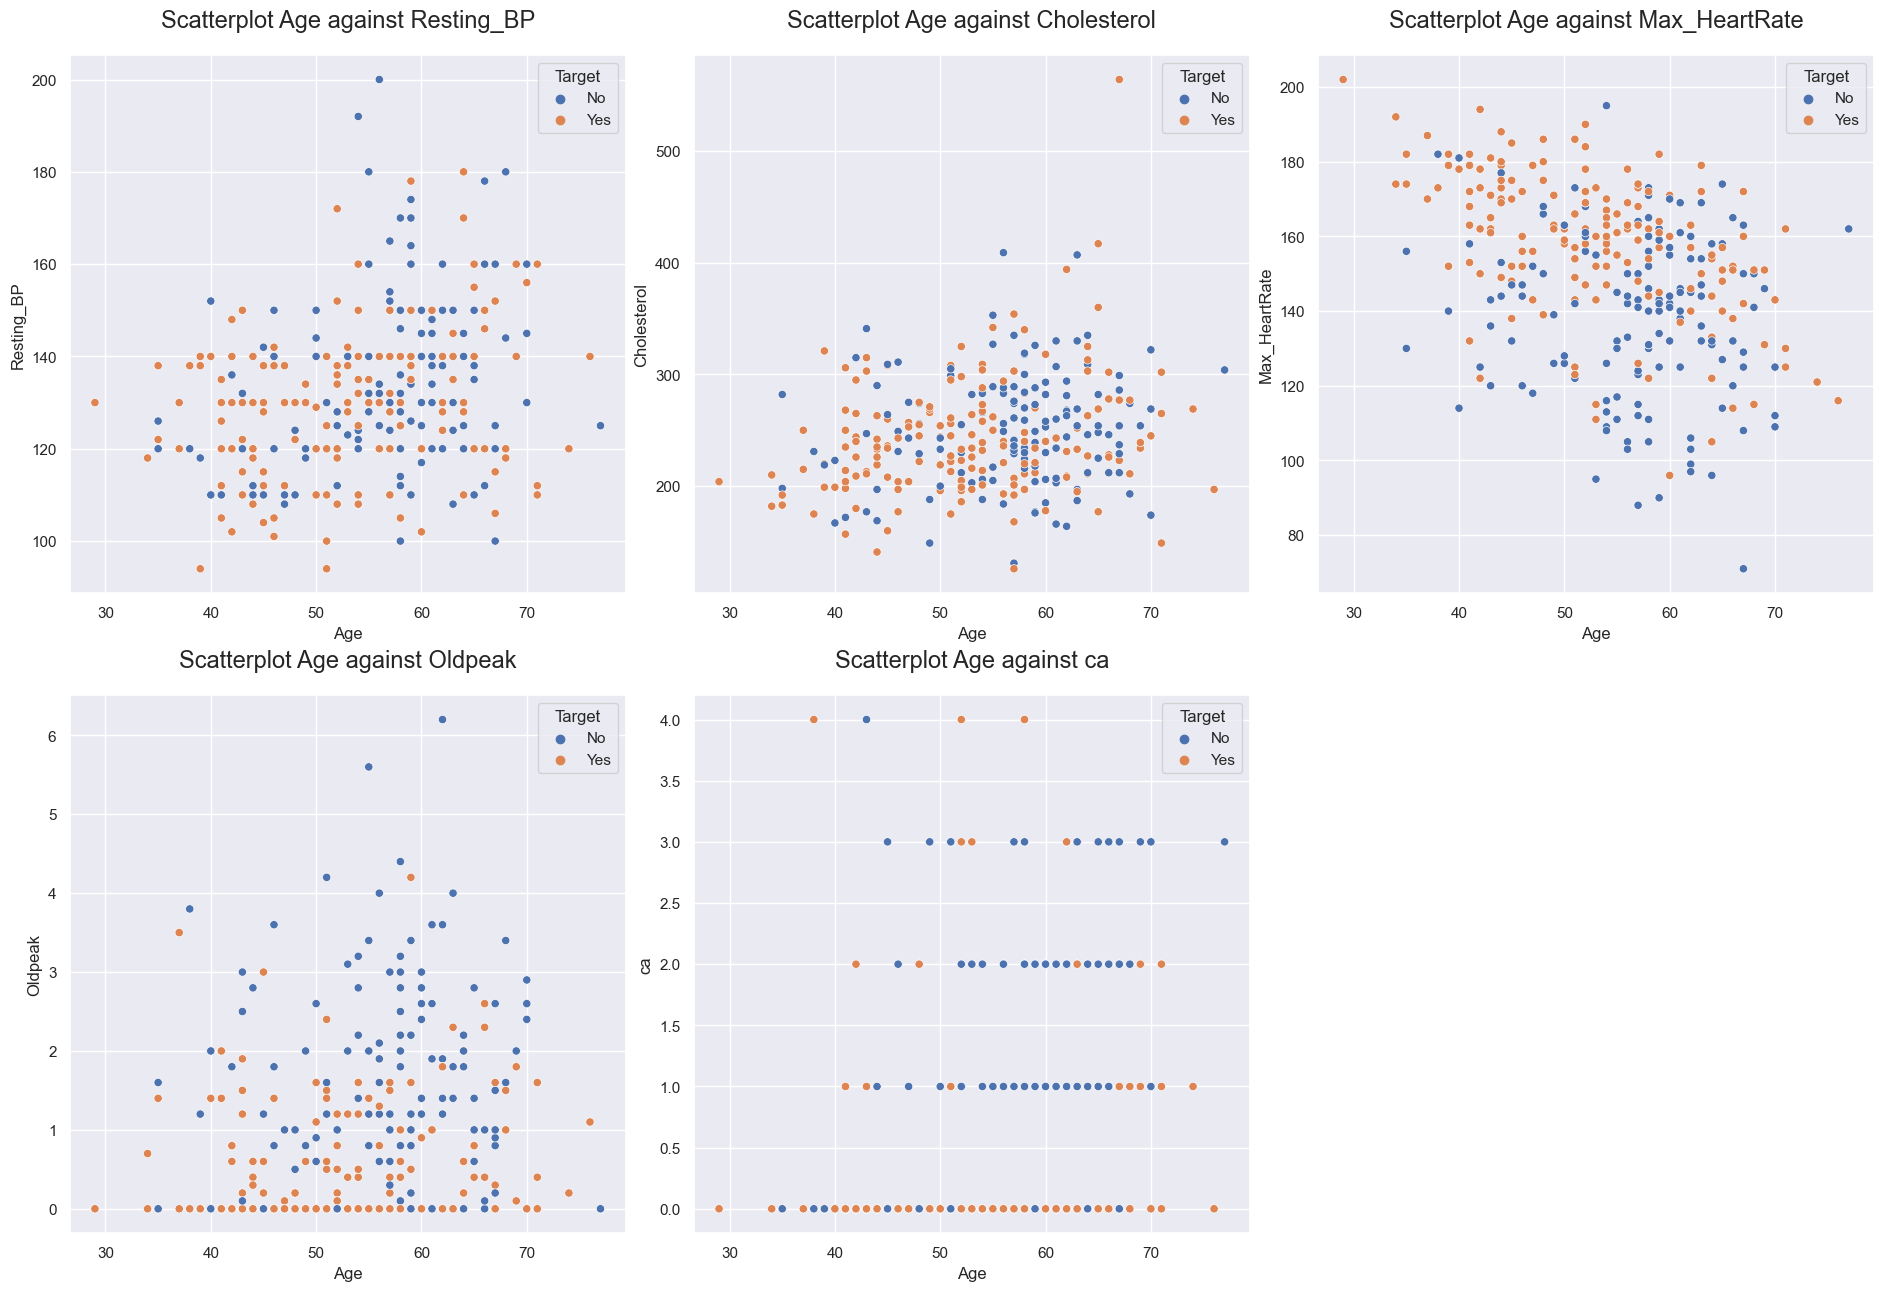

In [21]:
#scatterplot
plt.figure(figsize=(19,19))

#removing age
num_cols.remove('Age')
for idx, col in enumerate(num_cols):
    plt.subplot(3,3, idx+1)

    sns.scatterplot(
        x='Age',
        y=heart_df[col],
        data=heart_df,
        hue='Target'
    )

    plt.title(f'Scatterplot Age against {col}', pad=20, fontsize=17)
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5)

plt.show()



#### <b> <a id='7' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Outlier Detection</a><b>

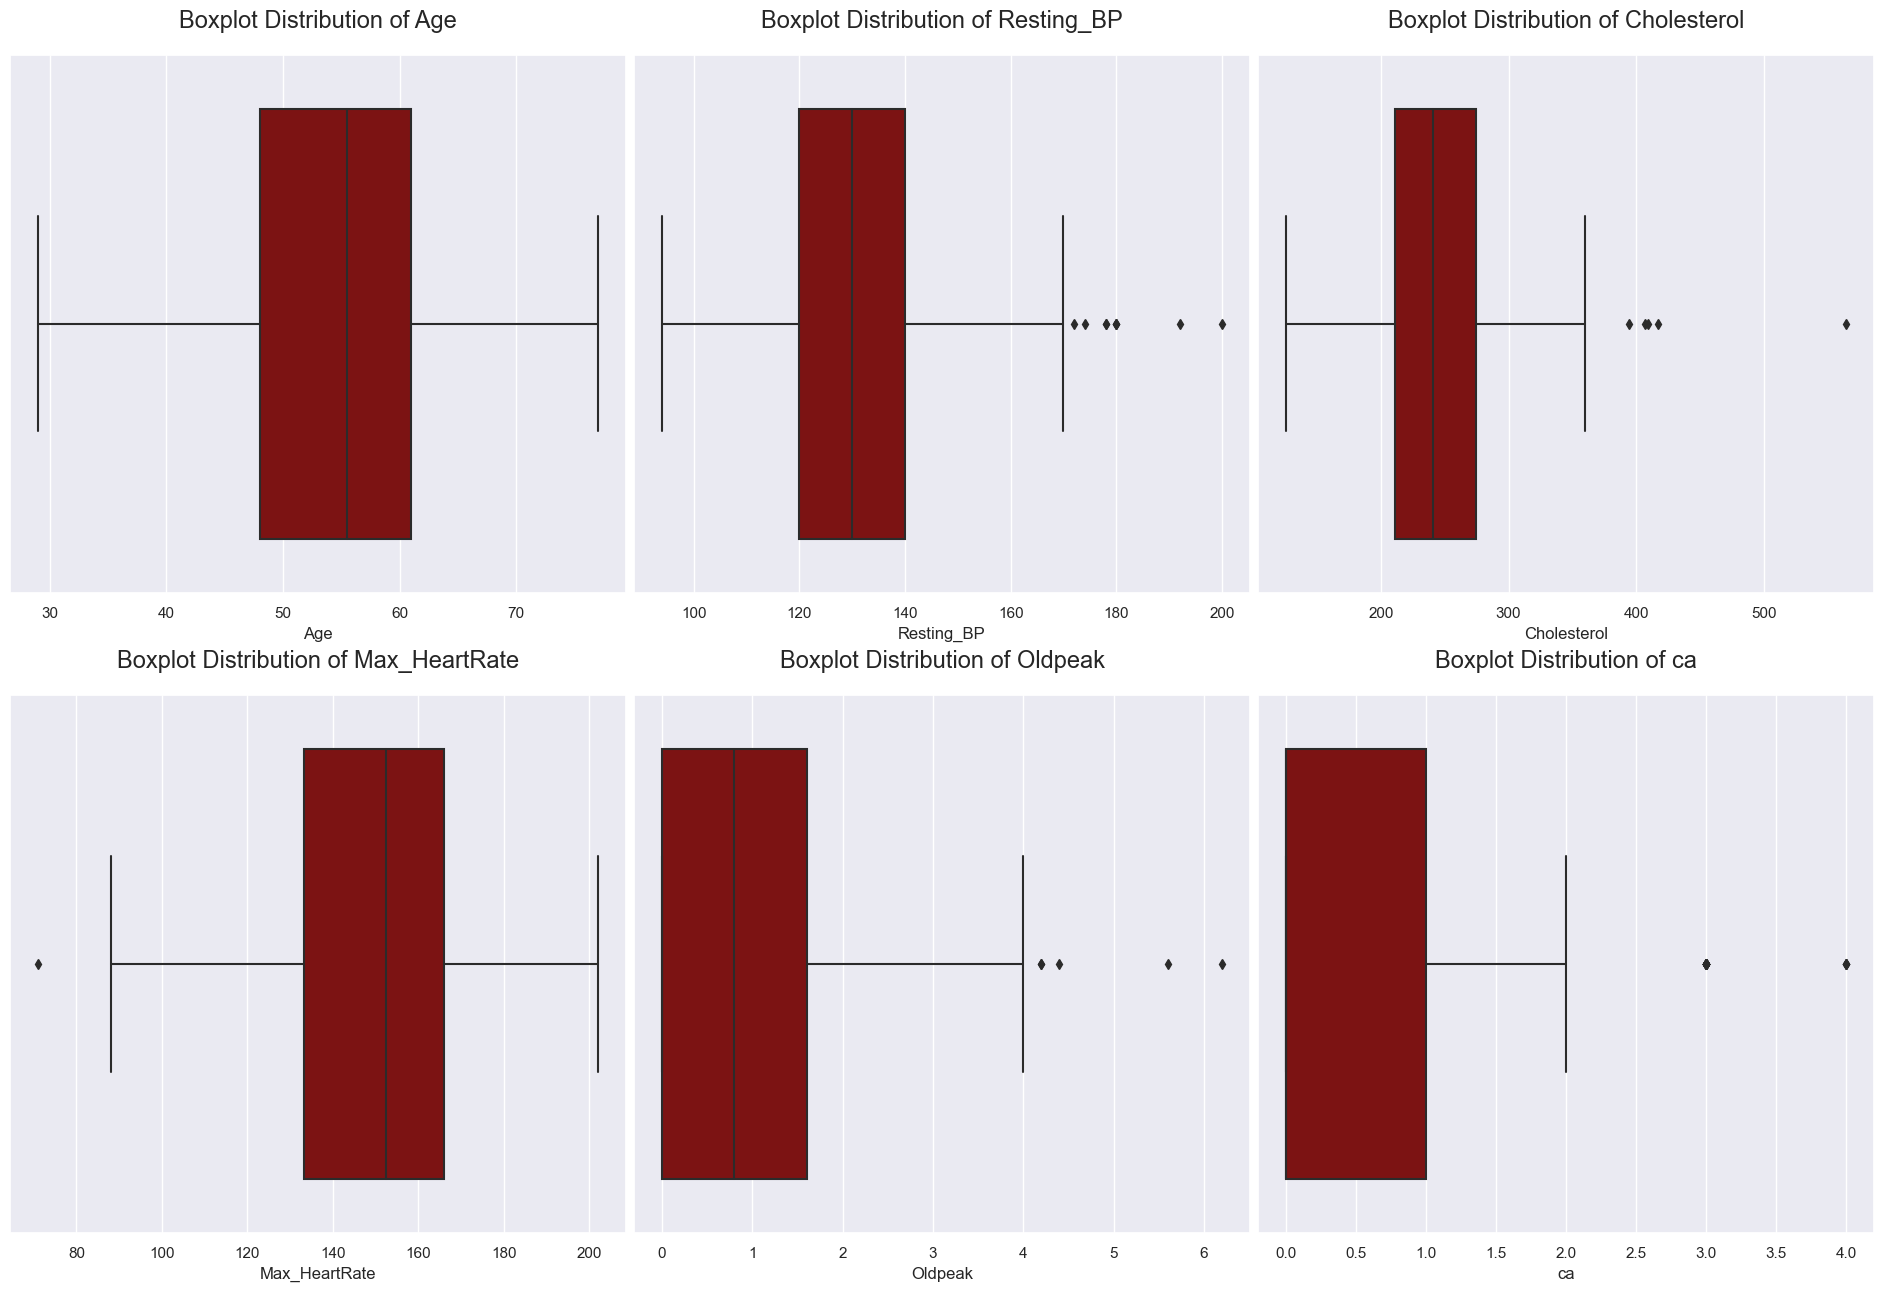

In [22]:
#selecting numerical columns
num_cols = heart_df.select_dtypes(exclude='object').columns.to_list()

#boxplot
plt.figure(figsize=(19,19))
colors =  ['#8e0201', '#e8cccc']

for idx, col in enumerate(num_cols):
    plt.subplot(3,3, idx+1)

    sns.boxplot(
        x=heart_df[col],
        data=heart_df,
        palette=colors
    )

    plt.title(f'Boxplot Distribution of {col}', pad=20, fontsize=17)
    plt.tight_layout(h_pad=0.5, w_pad=0.5)

plt.show()

In [23]:
#making a copy
tdf = heart_df.copy()

In [24]:
df_drop =heart_df[
    (heart_df['Resting_BP']>170) | (heart_df['Cholesterol'] > 370) | ( heart_df['Max_HeartRate'] < 80) | (heart_df['Oldpeak'] >4) | (heart_df['ca']> 2.0)
]

#dropping the outliers
heart_df = heart_df.drop(df_drop.index, axis=0)

#### <b> <a id='8' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Correlation Matrix</a><b>

In [25]:
#encoding the target
encode_map ={
    'Gender': {'Female': 0, 'Male': 1},
    'Chest Pain': {'Typical Angina':0, 'Atypical Angina':1, 'Non-Anginal Pain':2, 'Asymptomatic':3},
    'Fast_BS': {'No':0, 'Yes':1},
    'Resting_Electrocardiographic': {'Normal':0, 'Abnormal':1, 'Left Ventricular Hypertrophy':2},
    'Exercise_Angina': {'No':0,'Yes': 1},
    'Slope': {'Downsloping':0, 'Upsloping':1, 'Flat':2},
    'Thalassemia': {'Reversible Defect':1, 'Fixed Defect':2, 'Normal':3},
    'Target': {'No': 0, 'Yes': 1}
}

for col , map in encode_map.items():
    heart_df[col] = heart_df[col].map(map)

print('Completed', '--'*20)

Completed ----------------------------------------


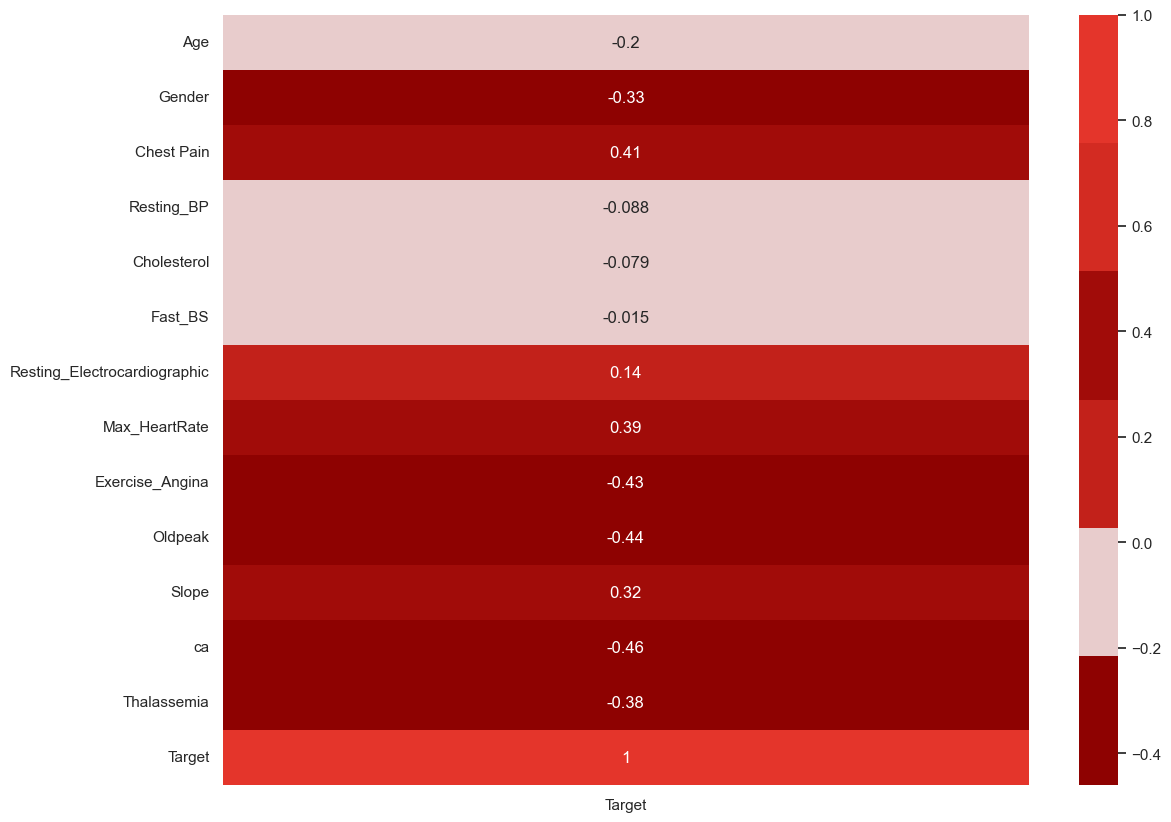

In [26]:
#checing the correlation of the features with the target 
corr_target = heart_df.corr()[['Target']]

plt.figure(figsize=(13,10))
colors = ['#8e0201','#e8cccc', '#c2211a',  '#a10c09', '#d32b22', '#e4352b']
sns.heatmap(corr_target, annot=True, cmap=colors)
plt.show()

<Axes: >

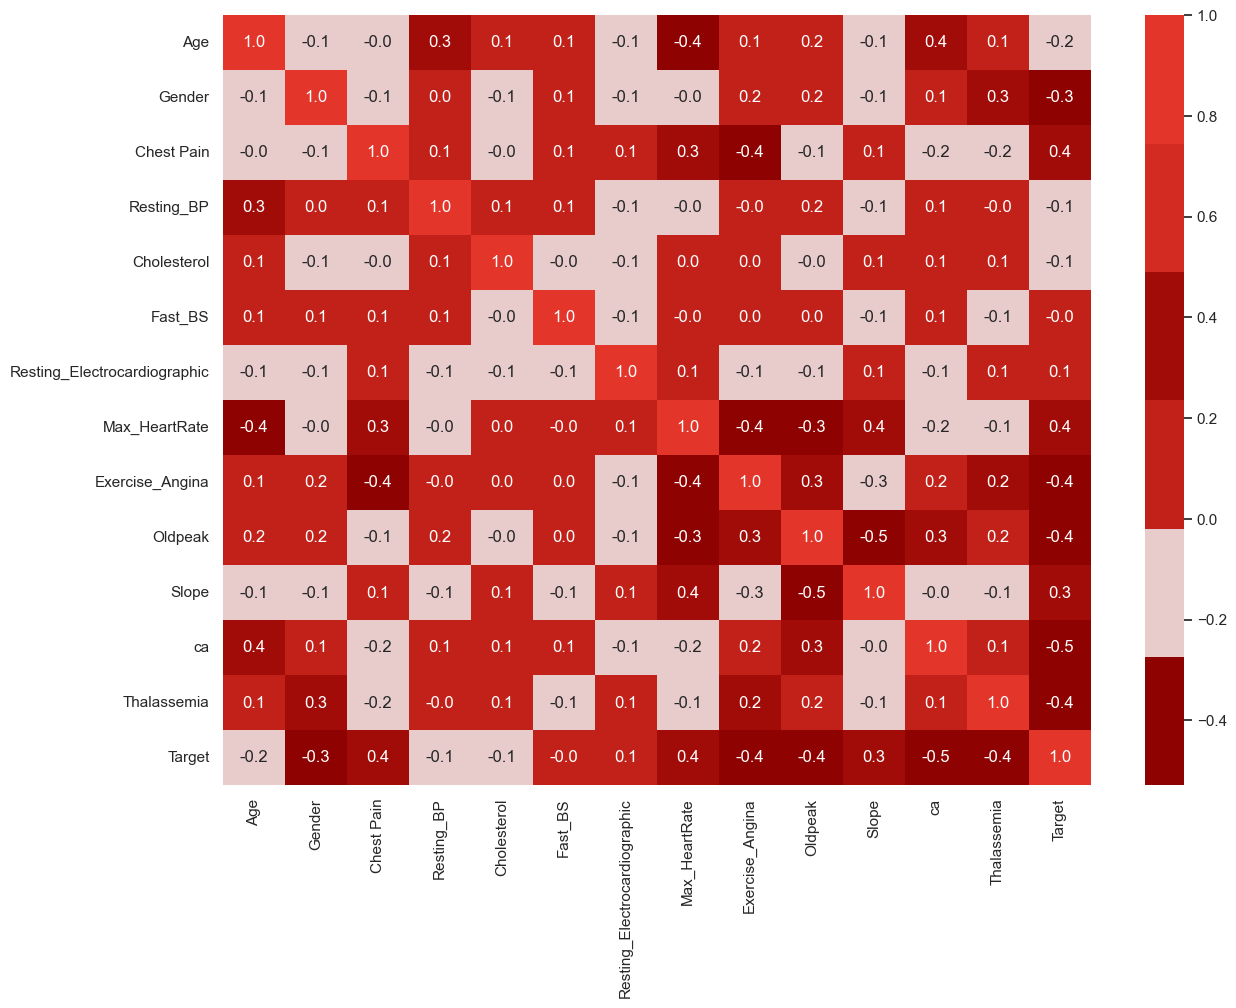

In [27]:
#overall correaltion matrix
plt.figure(figsize=(14,10))
sns.heatmap(
    heart_df.corr(), annot=True, cmap=colors, fmt='.1f'
)

#### <b> <a id='9' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Data Splitting & Scaling</a><b>

In [28]:
#making a copy 
final_df = heart_df.copy()

In [57]:
final_df

,Age,Gender,Chest Pain,Resting_BP,Cholesterol,Fast_BS,Resting_Electrocardiographic,Max_HeartRate,Exercise_Angina,Oldpeak,Slope,ca,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [29]:
#features
X= final_df.drop(['Target', 'Fast_BS'], axis=1)
#target
y= final_df['Target']

In [30]:
X.sample()

,Age,Gender,Chest Pain,Resting_BP,Cholesterol,Resting_Electrocardiographic,Max_HeartRate,Exercise_Angina,Oldpeak,Slope,ca,Thalassemia
71,61,1,0,140,207,0,138,1,1.9,2,1,3


In [31]:
#features to scale
for col in X.columns.to_list():
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[[col]])

print('Finished', '--'*20)

Finished ----------------------------------------


In [32]:
#data splittnng
X_train, X_test, y_train , y_test = train_test_split(X,y, random_state=2, test_size=0.2)

print('Train Shape', X_train.shape, y_train.shape)

print('Test Shape', X_test.shape, y_test.shape)

Train Shape (210, 12) (210,)
Test Shape (53, 12) (53,)


#### <b> <a id='9' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Model Building & Evaluation</a><b>

In [33]:
def model_evaluation(model):
    #training the model
    model.fit(X_train, y_train)

    #making predictions
    y_pred =model.predict(X_test)

    #classification report
    report = classification_report(y_pred, y_test)


    print(f'Name:{model}')
    print('--'*20,'Report', '--'*20)
    print(report)

In [34]:
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVM': SVC()
}

In [35]:
for name, model in models.items():
    model_evaluation(model)

Name:LogisticRegression()
---------------------------------------- Report ----------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.87      0.84      0.86        32

    accuracy                           0.83        53
   macro avg       0.82      0.83      0.82        53
weighted avg       0.83      0.83      0.83        53

Name:KNeighborsClassifier()
---------------------------------------- Report ----------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.90      0.90      0.90        31

    accuracy                           0.89        53
   macro avg       0.88      0.88      0.88        53
weighted avg       0.89      0.89      0.89        53

Name:SVC()
---------------------------------------- Report ----------------------------------------
              

Inferences:
1. The KNeighbors Model had the highest Accuracy, Precison , Recall and F1 Score.
2. The Logistic Regresssion and SVM model had similar score for both Accurcy, Precision , Recall and F1 Socre.
3. We will perform Hypeparameter Tuning on the KNeighbors Model.

#### <b> <a id='10' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'> Hyperparameter Tuning</a><b>

In [44]:
param_grid = {
    'n_neighbors': list(range(1, 50, 12)),
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]
}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Create a KFold object for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=30, scoring='accuracy', cv=kfold, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

best = random_search.best_params_
# Print the best parameters found
print("Best Parameters:", best)

# Print the best score found
print("Best Score:", random_search.best_score_)

Best Parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 13}
Best Score: 0.8428571428571429


#### <b> <a id='16' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Final Model & ROC Plot</a><b>

In [48]:
#final model
model = KNeighborsClassifier(**best)

#model training
model.fit(X_train, y_train)

#making predictions
y_pred =model.predict(X_test)

In [49]:
#classifcatin report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.85      0.94      0.89        31

    accuracy                           0.87        53
   macro avg       0.87      0.85      0.86        53
weighted avg       0.87      0.87      0.87        53



Inferences:
1. The Optimized model got an accuracy score of 87%. It correctly classified 87% of each class.
2. The model had a very high precision in classify both classes and a relatively high recall too.
3. The F1 score for both class a very high which means there is a steady balance between sensistivy and precision.

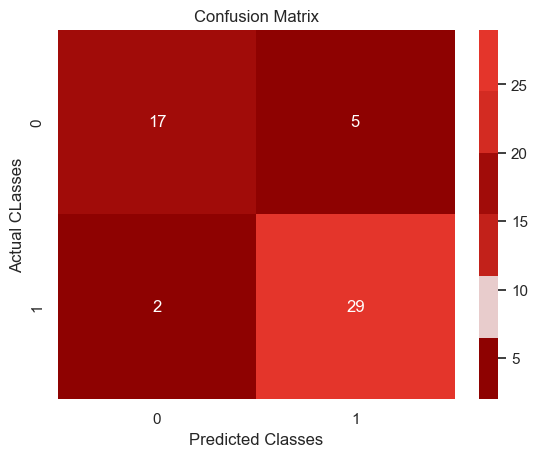

In [53]:
#confusion matrix
matrix = confusion_matrix(y_test, y_pred)

#plotting the matrix

sns.heatmap(matrix, annot=True, cmap=colors, fmt='g')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual CLasses')
plt.title('Confusion Matrix')

plt.show()

Inferences:
1. The Model Correctly classified 17 classess as True Negative and 29 classes are True Positive
2. The Model Incorreclty classifed 5 classes as a Positive (False Positve) and 2 classes are Negative (False Negatve).

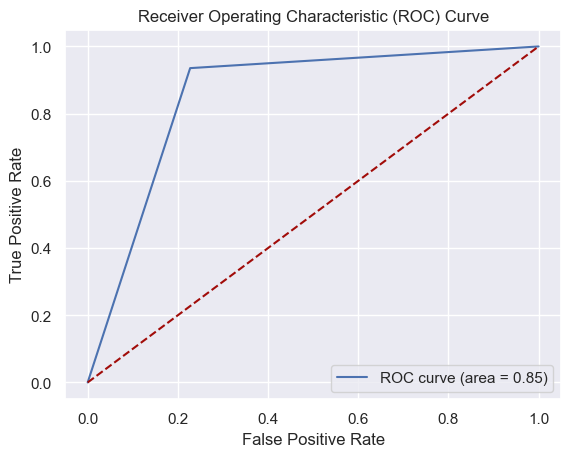

In [82]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

#calculate the Auc
auc_score = auc(fpr, tpr)

#displaying the roc currve
sns.lineplot(
    x=fpr, y=tpr, palette=colors
)
plt.plot([0,1], [0,1], linestyle='--', color=colors[3])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc_score])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

Inference:
1. The Receiver Operating Characteristic (ROC) Curve Area for the KNN Model is 0.85 which is really good.

#### <b> <a id='17' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Model Saving</a><b>

In [83]:
#saving the model
import joblib
joblib.dump(model, 'KNN-Heart-Disease-predictor.joblib')

['KNN-Heart-Disease-predictor.joblib']

#### <b> <a id='18' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Predictive System</a><b>

In [84]:
#building a predictive system
features = (63,0,2,135,252,0,172,0,0,2,0,2)

input_data = np.array(features).reshape(1,-1)

predictor = joblib.load('KNN-Heart-Disease-predictor.joblib')

prediction = predictor.predict(input_data)

output = ['Patient has no Sign of Heart Disease' if prediction[0] == 0 else 'Patient has Heart Disease']
print(f'The System Predicts {output[0]}')

The System Predicts Patient has Heart Disease


#### <b> <a id='19' style='font-size:16px; background-color:gray; color:white; padding: 0.5rem; border-radius:0.5rem'>Conclusion</a><b>

Leverage Machine Learning Algorithms like KNeighbors, Logistic Regression and Support Vector Machine to classify Heart Disease based on several Features. It emerged that KNeighbors had the most accurate predictions of each model.